## Đọc ảnh nhòe theo phương ngang

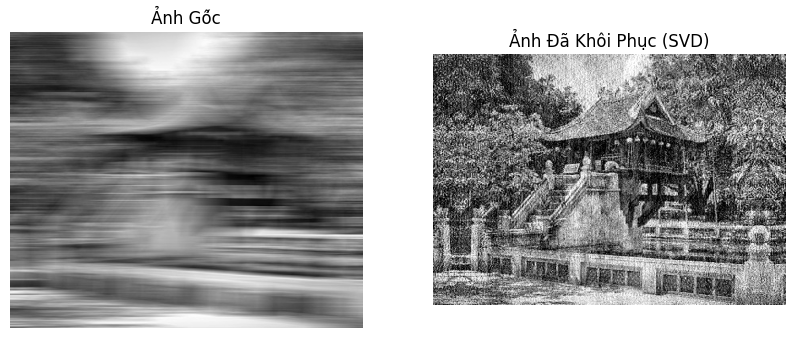

array([[ 98.03125857, 120.88840143, 120.88840143, ..., 109.45983   ,
        120.88840143,  63.74554428],
       [ 77.49931451, 237.49931451, 157.49931451, ...,  66.07074308,
          0.        ,  54.64217165],
       [ 63.41650672, 120.55936386,  51.98793529, ..., 131.98793529,
         17.702221  ,  40.55936386],
       ...,
       [117.29092405, 117.29092405, 140.1480669 , ...,  71.57663833,
        105.86235262,  48.71949548],
       [ 44.72717302,  67.58431588, 159.0128873 , ..., 113.29860159,
         44.72717302, 136.15574445],
       [116.61091308, 162.32519879, 162.32519879, ..., 173.75377022,
         36.61091308, 230.89662736]], shape=(370, 519))

In [1]:
def khoi_phuc_nhoe_ngang(link_anh, do_dai_nhoe):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    from scipy.linalg import svd
    import urllib.request

    response = urllib.request.urlopen(link_anh)
    img = Image.open(response).convert("L")
    B = np.array(img)
    r = B.shape[0]
    m = B.shape[1]
    n = m + do_dai_nhoe - 1
    A = np.zeros((m, n))

    i = 0
    j = 0
    while (i < m or j + do_dai_nhoe - 1 < n):
        A[i, j:j + do_dai_nhoe] = 1/do_dai_nhoe
        i += 1
        j += 1

    U, Sigma, Vt = svd(A, full_matrices=False)
    Sigma_inv = np.diag(1 / Sigma)
    A_inv = Vt.T @ Sigma_inv @ U.T
    X_plus = B @ A_inv.T
    X_plus = np.clip(X_plus, 0, 255)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Ảnh Gốc")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(X_plus, cmap="gray")
    plt.title("Ảnh Đã Khôi Phục (SVD)")
    plt.axis("off")

    plt.show()

    return X_plus

khoi_phuc_nhoe_ngang("https://drive.usercontent.google.com/u/2/uc?id=1mb-KNwuCEBMg9Edevi_Pr2Odtkfl9L0Z&export=download", 80)

## Đọc ảnh nhòe phương dọc

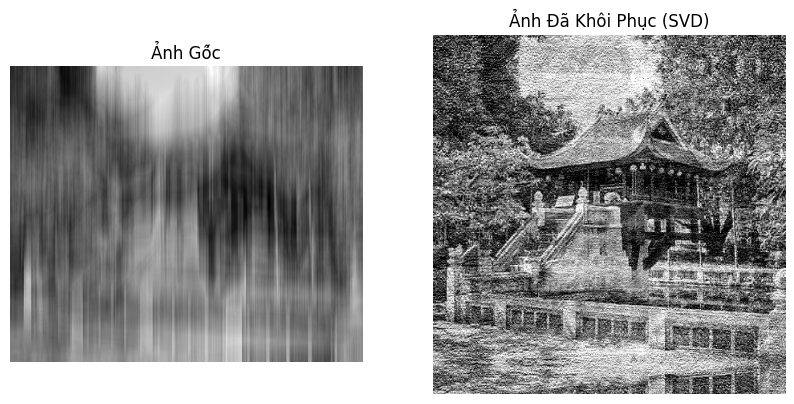

array([[ 52.25058005,   0.        ,  12.18870843, ...,   0.        ,
          1.08275329, 152.48259861],
       [132.25058005,  88.13611756,  92.18870843, ...,  40.43310131,
        107.74941995, 152.48259861],
       [132.25058005,  61.46945089,  52.18870843, ..., 107.09976798,
         41.08275329,  32.48259861],
       ...,
       [212.25058005, 208.13611756, 185.52204176, ...,  80.43310131,
         67.74941995, 139.14926527],
       [118.91724671, 154.80278422, 225.52204176, ..., 227.09976798,
        255.        ,  45.81593194],
       [212.25058005, 114.80278422, 172.18870843, ..., 173.76643465,
        187.74941995, 192.48259861]], shape=(449, 440))

In [2]:
def khoi_phuc_nhoe_doc(link_anh, do_dai_nhoe):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    from scipy.linalg import svd
    import urllib.request

    response = urllib.request.urlopen(link_anh)
    img = Image.open(response).convert("L")
    B = np.array(img)
    r = B.shape[0]
    m = B.shape[1]
    n = r + do_dai_nhoe - 1
    A = np.zeros((r, n))

    i = 0
    j = 0
    while (i < r or j + do_dai_nhoe < n):
        A[i, j:j + do_dai_nhoe] = 1/do_dai_nhoe
        i += 1
        j += 1

    U, Sigma, Vt = svd(A, full_matrices=False)
    Sigma_inv = np.diag(1 / Sigma)
    A_inv = Vt.T @ Sigma_inv @ U.T
    X_plus = A_inv @ B
    X_plus = np.clip(X_plus, 0, 255)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Ảnh Gốc")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(X_plus, cmap="gray")
    plt.title("Ảnh Đã Khôi Phục (SVD)")
    plt.axis("off")

    plt.show()

    return X_plus

khoi_phuc_nhoe_doc("https://drive.usercontent.google.com/u/2/uc?id=1HNoGlOUH2HB1S7ToVDF4l7oGc36QuEWP&export=download", 80)